<a href="https://colab.research.google.com/github/RSD18/Machine-Learning-Classifiers/blob/master/Machine_Learning_classifiers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:58: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


   mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        17.99         10.38  ...          0.4601                  0.11890
1        20.57         17.77  ...          0.2750                  0.08902
2        19.69         21.25  ...          0.3613                  0.08758
3        11.42         20.38  ...          0.6638                  0.17300
4        20.29         14.34  ...          0.2364                  0.07678

[5 rows x 30 columns]
0
0
     benign
0         0
1         0
2         0
3         0
4         0
..      ...
564       0
565       0
566       0
567       0
568       1

[569 rows x 1 columns]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

1  0.8771929824561403
2  0.8421052631578947
3  0.8947368421052632
4  0.20175438596491227
5  0.8947368421052632
6  0.8771929824561403
7  0.8947368421052632
8  0.8947368421052632
9  0.9122807017543859


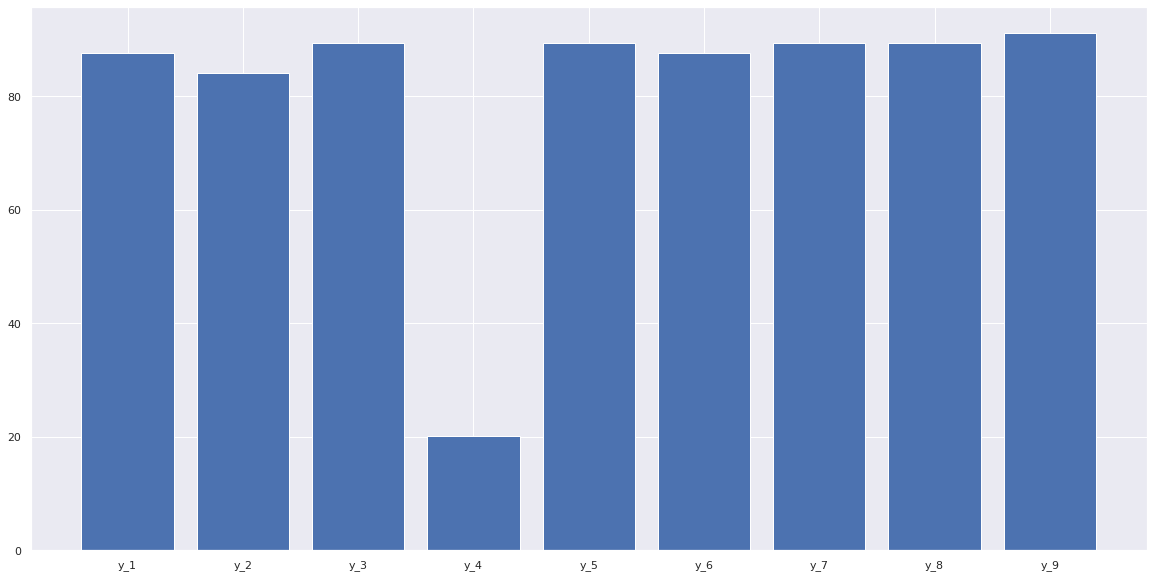

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier
smx=SGDClassifier()
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set()

breast_cancer = load_breast_cancer()
# print(breast_cancer)
X = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
print(X.head())

print(X.isnull().any().sum())

# print(X.describe())
X = X[['mean area', 'mean compactness']]
# print(X)


y = pd.Categorical.from_codes(breast_cancer.target, breast_cancer.target_names)
y = pd.get_dummies(y, drop_first=True)
print(y.isnull().any().sum())
print(y) 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.2)

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred_1=lr.predict(X_test)
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_2 = knn.predict(X_test)
de_gi= DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=2, min_samples_leaf=5)
de_gi.fit(X_train, y_train)
y_pred_3=de_gi.predict(X_test)
km=KMeans(n_clusters=2)
km.fit(X_train,y_train)
y_pred_4=km.predict(X_test)
rf = RandomForestRegressor()
rf.fit(X_train,y_train)
y_pred_5=rf.predict(X_test)
y_pred_5 = [int(round(p)) for p in y_pred_5]
sv=SVC(kernel='poly')
sv.fit(X_train,y_train)
y_pred_6=sv.predict(X_test)
# df=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_9})
# print(df)
xgb_1=XGBClassifier()
xgb_1.fit(X_train,y_train)
y_pred_7=xgb_1.predict(X_test)
gb_1=GradientBoostingClassifier()
gb_1.fit(X_train,y_train)
y_pred_8=gb_1.predict(X_test)
# print(y_test['benign'].to_list())
gnb_1=GaussianNB()
gnb_1.fit(X_train,y_train)
y_pred_9=gnb_1.predict(X_test)
# print(confusion_matrix(y_test,y_pred))
print("1 ",accuracy_score(y_test,y_pred_1))
print("2 " ,accuracy_score(y_test,y_pred_2))
print("3 ",accuracy_score(y_test,y_pred_3))
print("4 ",accuracy_score(y_test,y_pred_4))
print("5 ",accuracy_score(y_test,y_pred_5))
print("6 ",accuracy_score(y_test,y_pred_6))
print("7 ",accuracy_score(y_test,y_pred_7))
print("8 ",accuracy_score(y_test,y_pred_8))
print("9 ",accuracy_score(y_test,y_pred_9))
  
# plt.scatter(range(len(y_pred)),[int(round(p)) for p in y_pred])
# plt.scatter(X['mean area'], X['mean compactness'],marker="*")
# sns.relplot(x='mean area',y='mean compactness',hue='target_names',data=breast_cancer)
# np.array(y_test.to_list()
# plt.scatter(
#     X_test['mean area'],
#     X_test['mean compactness'],
#     c=y_pred,
#     cmap='coolwarm',
#     alpha=0.7
# )
# y_pred=pd.Dataframe(data=[['accuracy_score(y_test,y_pred_1)'],['accuracy_score(y_test,y_pred_2)']])
# sns.scatterplot(
#     x='mean area',
#     y='mean compactness',
#     hue='benign',
#     data=X_test.join(y_test, how='outer')
# )
obj=['y_1','y_2','y_3','y_4','y_5','y_6','y_7','y_8','y_9']
# x_pos=np.arange(len(obj))
accu=[accuracy_score(y_test,y_pred_1)*100,accuracy_score(y_test,y_pred_2)*100,accuracy_score(y_test,y_pred_3)*100,accuracy_score(y_test,y_pred_4)*100,accuracy_score(y_test,y_pred_5)*100,accuracy_score(y_test,y_pred_6)*100,accuracy_score(y_test,y_pred_7)*100,accuracy_score(y_test,y_pred_8)*100,accuracy_score(y_test,y_pred_9)*100]
# plt.bar(y_pos, accu, align='center',width=0.6)
# plt.yticks()
# plt.xticks(x_pos, obj)
# plt.ylabel('accuracy')
# plt.show()
fig_dims = (20, 10)
# fig, ax = plt.subplots(figsize=fig_dims)
plt.figure(figsize=fig_dims)
# sns.barplot(obj,accu,dodge=False)
plt.bar(obj,accu,width=.8)
plt.show()

In [0]:
  import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler;
data = pd.read_csv("https://media.geeksforgeeks.org/wp-content/uploads/nba.csv") 
data.head()
data=data.dropna()
data.head()
# data=pd.get_dummies(data[['Name','Number','Weight','Salary']])
print(data)
# data.apply(lambda x: float(x[]) )
# x=data[['Salary','Weight']]
# y=data[['Name','Weight']]
# std=StandardScaler().fit(x)
# x=std.transform(x)
# print(x)
# df_cat = pd.DataFrame(data = 
#                      [['green','M',10.1,'class1'],
#                       ['blue','L',20.1,'class2'],
#                       ['white','M',30.1,'class1']])
# df_cat.columns = ['color','size','price','classlabel']
# size_mapping = {'M':1,'L':2}
# print(df_cat)
# df_cat['size'] = df_cat['size'].map(size_mapping)
# class_le = LabelEncoder()
# df_cat['classlabel'] =class_le.fit_transform(df_cat['classlabel'].values)
# df_cat = pd.get_dummies(df_cat[['color','size','price','classlabel']],drop_first=True)
# df_cat
